In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Setting Seaborn Styles
sns.set(style="whitegrid")
sns.set_palette((sns.color_palette('colorblind', 8)))
dims = (11.7, 8.27)
plt.tight_layout(pad=2)

## Setting random seed
np.random.seed(1000)

In [2]:
## Importing data and making the zip code a string so it can show the beginning 0 if it has one
df = pd.read_csv('Lab2/Zip_Zhvi_SingleFamilyResidence.csv')
df['RegionName'] = df['RegionName'].astype('str').apply(lambda x: x.zfill(5))

## Dropping columns that aren't used in the lab
drop_cols = ['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '2014-04', 
             '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', 
             '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', 
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', 
             '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', 
             '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             'RegionID', 'SizeRank']

for col in df.columns:
    if col.startswith(tuple(drop_cols)):
        df.drop(list(df.filter(regex=col)), axis = 1, inplace = True) 
    else:
        pass



In [4]:
## Starting AK metro area analysis
## Make a copy of the parent dataframe and drop the 2014 columns since they won't be used here

df_97_13 = df.copy()

keep_cols = ['RegionName', 'City', 'State', 'Metro', 'CountyName']
keep_97_13_periods = ['1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07',
                      '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02',
                      '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09',
                      '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04',
                      '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11',
                      '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
                      '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01',
                      '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08',
                      '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03',
                      '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10',
                      '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05',
                      '2003-06', '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12',
                      '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07',
                      '2004-08', '2004-09', '2004-10', '2004-11', '2004-12', '2005-01', '2005-02',
                      '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09',
                      '2005-10', '2005-11', '2005-12', '2006-01', '2006-02', '2006-03', '2006-04',
                      '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11',
                      '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
                      '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01',
                      '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08',
                      '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03',
                      '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10',
                      '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
                      '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
                      '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07',
                      '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02',
                      '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09',
                      '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04',
                      '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', 
                      '2013-12']
dropyears_97_13 = ['2014']

for col in df_97_13.columns:
    if col.startswith(tuple(dropyears_97_13)):
        df_97_13.drop(list(df_97_13.filter(regex=col)), axis = 1, inplace = True) 
    else:
        pass

## Turning the Year-Month columns into rows using the melt function
## Turning the new YearMonth column into a proper formatted datetime
df_97_13_melty = pd.melt(frame=df_97_13, id_vars=keep_cols, value_vars=keep_97_13_periods, var_name='YearMonth', value_name='HousePrice')
df_97_13_melty['YearMonth'] = pd.to_datetime(df_97_13_melty['YearMonth'], format='%Y-%m')

## Dropping NA values
df_97_13_melty.dropna(inplace=True)

## Splitting out the AK metro areas for analysis and merging them into a single dataframe
df_hotsprings = df_97_13_melty[df_97_13_melty['Metro'] == 'Hot Springs']
df_littlerock = df_97_13_melty[df_97_13_melty['Metro'] == 'Little Rock']
df_fayetteville = df_97_13_melty[df_97_13_melty['Metro'] == 'Fayetteville']
df_searcy = df_97_13_melty[df_97_13_melty['Metro'] == 'Searcy']
df_ak = pd.concat([df_hotsprings, df_searcy, df_fayetteville, df_littlerock], ignore_index=True)


In [5]:
## Aggregating the house price data by month for the time period and metro area
df_ak_agg = pd.Series.to_frame(df_ak.groupby(by=['YearMonth','Metro'])['HousePrice'].mean())
df_ak_agg.reset_index(level=0, inplace=True)
df_ak_agg.reset_index(level=0, inplace=True)


In [6]:
## Some descriptive statistics
print('All Metro Areas: ')
print(df_ak_agg.describe(include='all'))

print('\nHot Springs only:')
print(df_ak_agg[df_ak_agg['Metro'] == 'Hot Springs'].describe(include='all'))

print('\nLittle Rock only:')
print(df_ak_agg[df_ak_agg['Metro'] == 'Little Rock'].describe(include='all'))

print('\nFayetteville only:')
print(df_ak_agg[df_ak_agg['Metro'] == 'Fayetteville'].describe(include='all'))

print('\nSearcy only:')
print(df_ak_agg[df_ak_agg['Metro'] == 'Searcy'].describe(include='all'))

All Metro Areas: 
               Metro            YearMonth     HousePrice
count            816                  816     816.000000
unique             4                  204            NaN
top     Fayetteville  2009-09-01 00:00:00            NaN
freq             204                    4            NaN
first            NaN  1997-01-01 00:00:00            NaN
last             NaN  2013-12-01 00:00:00            NaN
mean             NaN                  NaN  105421.296400
std              NaN                  NaN   23287.949086
min              NaN                  NaN   62180.000000
25%              NaN                  NaN   85942.500000
50%              NaN                  NaN  101287.138863
75%              NaN                  NaN  127580.387931
max              NaN                  NaN  146155.172414

Hot Springs only:
              Metro            YearMonth     HousePrice
count           204                  204     204.000000
unique            1                  204            N

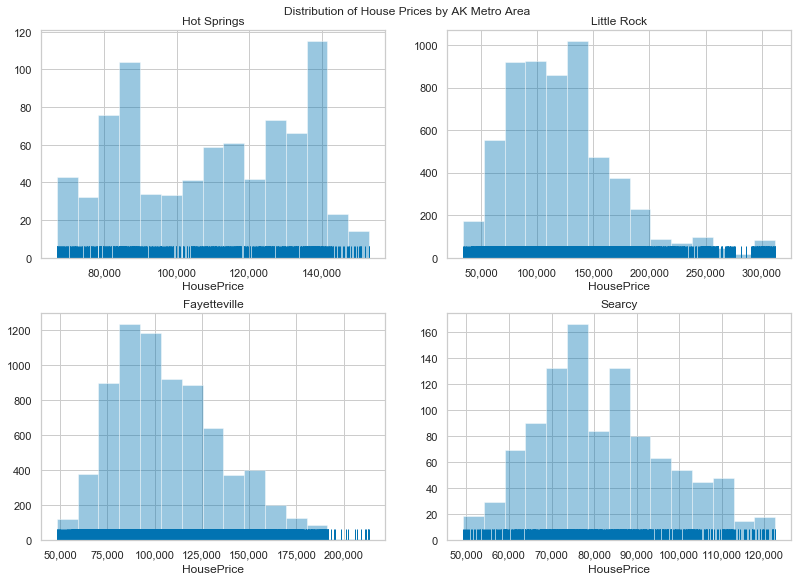

In [7]:
## Histograms for each AK metro area
fig1, ax1 = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=dims)
fig1.suptitle('Distribution of House Prices by AK Metro Area')
fig1.tight_layout(pad=3)

sns.distplot(df_hotsprings['HousePrice'], hist=True, bins=15, kde=False, rug=True, ax=ax1[0][0])
ax1[0][0].title.set_text('Hot Springs')
ax1[0][0].xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.distplot(df_littlerock['HousePrice'], hist=True, bins=15, kde=False, rug=True, ax=ax1[0][1])
ax1[0][1].title.set_text('Little Rock')
ax1[0][1].xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.distplot(df_fayetteville['HousePrice'], hist=True, bins=15, kde=False, rug=True, ax=ax1[1][0])
ax1[1][0].title.set_text('Fayetteville')
ax1[1][0].xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.distplot(df_searcy['HousePrice'], hist=True, bins=15, kde=False, rug=True, ax=ax1[1][1])
ax1[1][1].title.set_text('Searcy')
ax1[1][1].xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig1.savefig('Lab2/images/AK_Metro_Dist.png')

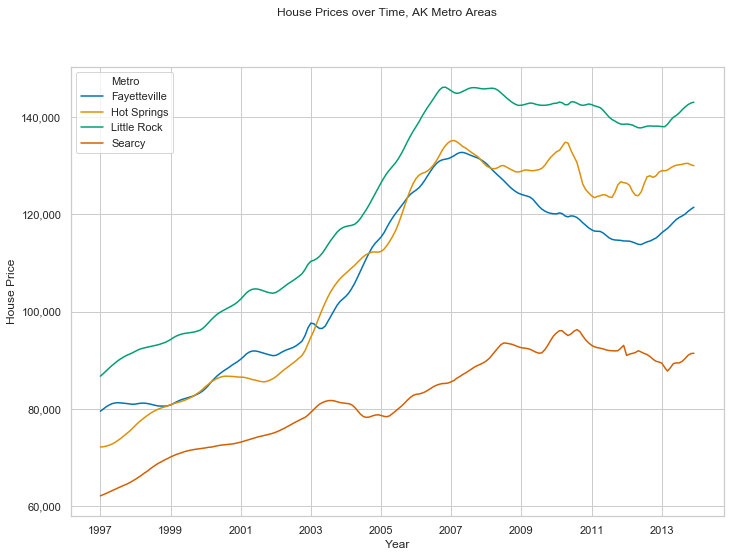

In [8]:
## AK Metro area House Prices over time
fig2, ax2 = plt.subplots(figsize=dims)
plot2 = sns.lineplot(x='YearMonth', y='HousePrice', data=df_ak_agg, hue='Metro')
fig2.suptitle('House Prices over Time, AK Metro Areas')
ax2.set_ylabel('House Price')
ax2.set_xlabel('Year')
ax2.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig2.savefig('Lab2/images/AK_Metro_Line.png')